In [1]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
from scipy import stats
import pandas as pd
import pandas_datareader as web 
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
start=datetime.datetime(2021,1,1)
end=datetime.datetime(2022,1,1)


In [4]:
df_nifty=web.DataReader("^NSEI","yahoo",start,end)
df_nifty.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,14049.849609,13991.349609,13996.099609,14018.500000,358100,14018.500000
2021-01-04,14147.950195,13953.750000,14104.349609,14132.900391,495000,14132.900391
2021-01-05,14215.599609,14048.150391,14075.150391,14199.500000,492500,14199.500000
2021-01-06,14244.150391,14039.900391,14240.950195,14146.250000,632300,14146.250000
2021-01-07,14256.250000,14123.099609,14253.750000,14137.349609,559200,14137.349609


In [5]:
df_b=web.DataReader("BAJFINANCE.NS","yahoo",start,end)
df_b.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,5338.000000,5250.000000,5310.200195,5280.149902,1447187.0,5252.506836
2021-01-04,5324.000000,5196.200195,5324.000000,5216.200195,2333659.0,5188.892090
2021-01-05,5224.200195,5062.500000,5218.000000,5119.000000,3953400.0,5092.200684
2021-01-06,5168.350098,4990.299805,5130.000000,5030.299805,3607923.0,5003.964844
2021-01-07,5131.549805,5021.299805,5065.000000,5081.000000,3035750.0,5054.399414


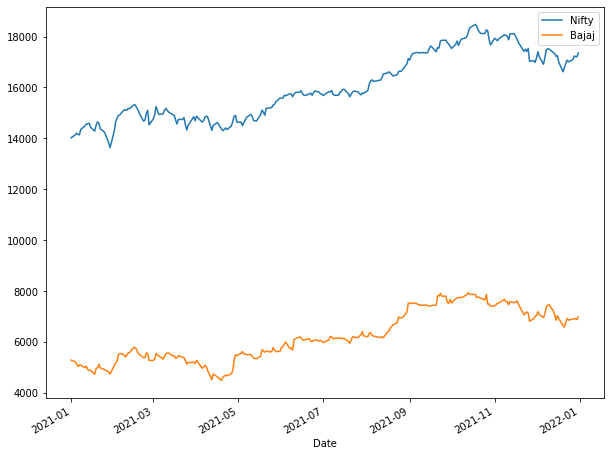

In [6]:
df_nifty['Close'].plot(label = 'Nifty', figsize=(10,8) )
df_b['Close'].plot(label = 'Bajaj')
plt.legend()

In [7]:
df_nifty['cum']=df_nifty["Close"]/df_nifty["Close"].iloc[0]
df_b['cum']=df_b["Close"]/df_b["Close"].iloc[0]


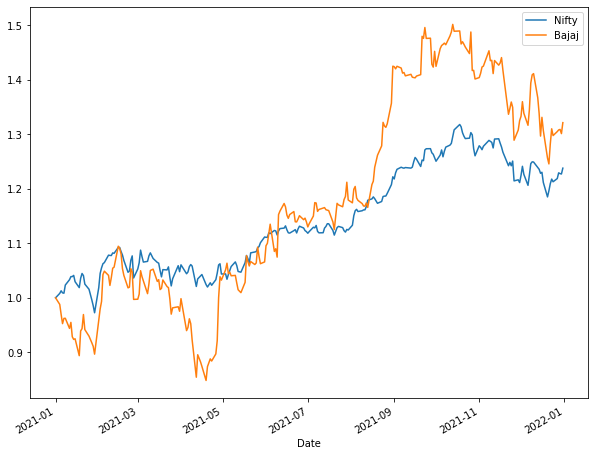

In [8]:
df_nifty['cum'].plot(label = 'Nifty', figsize=(10,8))
df_b['cum'].plot(label = 'Bajaj')
plt.legend()

In [9]:
df_nifty['daily_ret'] = df_nifty['Close'].pct_change(1)
df_b['daily_ret'] = df_b['Close'].pct_change(1)

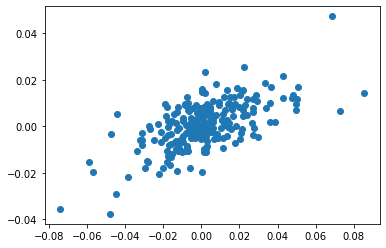

In [10]:
plt.scatter(df_b['daily_ret'],df_nifty['daily_ret'])

In [11]:
LR = stats.linregress(df_b['daily_ret'].iloc[1:],df_nifty['daily_ret'].iloc[1:])
LR

LinregressResult(slope=0.3028960742957345, intercept=0.0005058653732726757, rvalue=0.6396327955262322, pvalue=8.058089332556864e-30, stderr=0.023255506783162176, intercept_stderr=0.00048523313437910556)

In [12]:
beta,alpha,r_val,p_val,std_err = LR

In [13]:
beta#value_of_beta

0.3028960742957345

In [14]:
alpha#value_of_alpha 

0.0005058653732726757

In [15]:
date=datetime.datetime(2022,7,19)

In [16]:
rm = (df_nifty['Close'].iloc[-1]-df_nifty['Close'].iloc[0])/df_nifty['Close'].iloc[0]
rm

0.2379392075650034

In [17]:
rf=0.055 #fd return of sbi taken as risk free return
rf

0.055

In [18]:
r_val

0.6396327955262322

In [19]:
p_val

8.058089332556864e-30

In [20]:
smb=0.15

In [21]:
hml=0.17

In [22]:

expected_return_capm= 1+beta*(rm-rf)
expected_return_capm

1.0554115678062121

In [23]:
df_baj=web.DataReader("BAJFINANCE.NS","yahoo",date,date)
df_baj

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-07-19,6098.149902,6002.049805,6040,6065.950195,978560,6065.950195


In [24]:
actual_return=df_baj['Close'].iloc[0]/df_b['Close'].iloc[0]
actual_return

1.1488215879287724

In [25]:
err_capm=(actual_return-expected_return_capm)/actual_return
err_capm

0.08130942271982423

In [26]:
expected_return_fama=1+beta*(rm-rf)+r_val*smb+p_val*hml+alpha
expected_return_fama

1.1518623525084195

In [27]:
err_fama=(expected_return_fama-actual_return)/actual_return
err_fama

0.0026468553617009596

In [28]:
# So,It can be seen that return in fama-french Three_Factor model is less than CAPM model.